<a href="https://colab.research.google.com/github/a78sddrt/Algorithms/blob/main/Linear_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(2000, 1)
[ 0.7632     0.057163  -1.3415082 ...  3.2245042  3.6011596  3.628596 ]


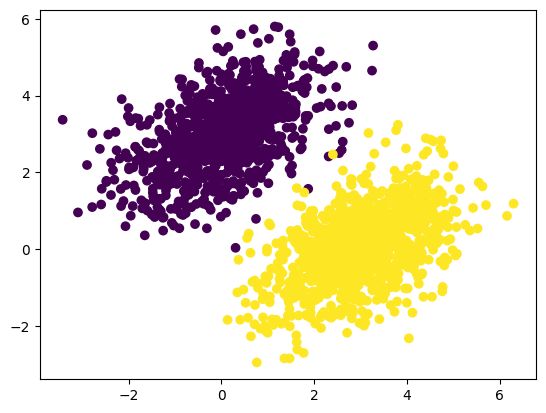

In [ ]:
import tensorflow as tf
import numpy as np

num_samples_per_class=1000
negative_samples=np.random.multivariate_normal(
    mean=[0,3], cov=[[1,0.5],[0.5,1]], size=num_samples_per_class
)

positive_samples=np.random.multivariate_normal(
    mean=[3,0], cov=[[1,0.5],[0.5,1]], size=num_samples_per_class
)
inputs=np.vstack((negative_samples,positive_samples)).astype(np.float32)
targets=np.vstack((np.zeros((num_samples_per_class,1),dtype='float32'),np.ones((num_samples_per_class,1),dtype='float32')))
print(targets.shape)
print(inputs[:,0])
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1], c=targets[:,0])
plt.show()

In [ ]:
input_dim=2
output_dim=1
W=tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b=tf.Variable(initial_value=tf.random.uniform(shape=(output_dim,)))
print(W)
W[0].assign([1,])
W[1].assign([-1,])
print(W)

def model(inputs):
  return tf.matmul(inputs, W)+b

def sqaure_loss(targets,prediction):
  per_sample_losses=tf.square(targets-prediction)
  return tf.reduce_mean(per_sample_losses)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.1254431],
       [0.5020256]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.],
       [-1.]], dtype=float32)>


In [ ]:
learning_rate=0.1 #神秘的挑選0.01 如果不考慮b 0.01似乎是比較好的選擇

def training_step(inputs,targets):
  with tf.GradientTape() as tape:
    predictions=model(inputs)
    loss=sqaure_loss(predictions,targets)
  grad_loss_wrt_W, grad_loss_wrt_b=tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W*learning_rate)
  b.assign_sub(grad_loss_wrt_b*learning_rate) #為什麼不考慮b就學不好了? 感覺是loss function的問題
  return loss

for step in range(20):
  loss=training_step(inputs, targets)
  print('Loss at step %d: %.4f' %(step, loss))



Loss at step 0: 7.0879
Loss at step 1: 0.0335
Loss at step 2: 0.0292
Loss at step 3: 0.0288
Loss at step 4: 0.0285
Loss at step 5: 0.0283
Loss at step 6: 0.0281
Loss at step 7: 0.0279
Loss at step 8: 0.0277
Loss at step 9: 0.0275
Loss at step 10: 0.0273
Loss at step 11: 0.0272
Loss at step 12: 0.0271
Loss at step 13: 0.0269
Loss at step 14: 0.0268
Loss at step 15: 0.0267
Loss at step 16: 0.0266
Loss at step 17: 0.0265
Loss at step 18: 0.0265
Loss at step 19: 0.0264


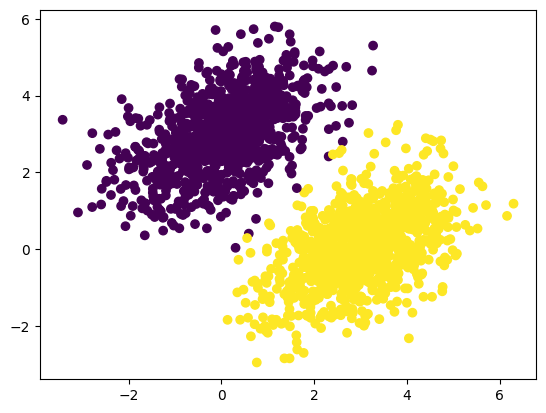

In [ ]:
predictions=model(inputs)
plt.scatter(inputs[:,0],inputs[:,1], c=predictions[:,0]>0.5)
plt.show()


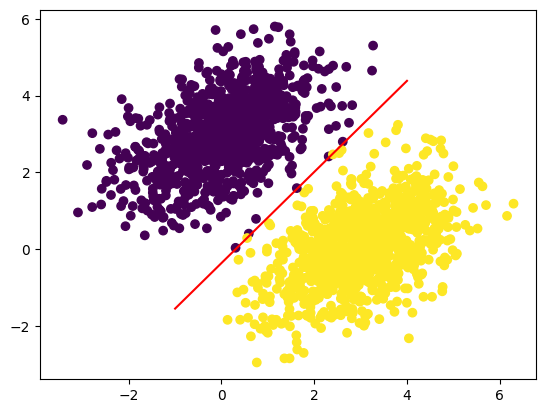

In [ ]:
x=np.linspace(-1,4,100)
y=-W[0]/W[1]*x+(0.5-b)/W[1]
plt.plot(x,y,'-r')
plt.scatter(inputs[:,0],inputs[:,1], c=predictions[:,0]>0.5)